In [34]:
!pip install geopandas

In [35]:
#Importacion de modulos importantes para la Investigacion
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df_co2_emissions = pd.read_csv('Data Emisiones de CO2.csv')
df_co2_emissions

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24646,ZWE,Zimbabwe,2015,12.170,13.308,1.65,0.198,1.138,0.881,0.963,...,4.885,11.87,0.859,6.68,0.484,13814642.0,2.102746e+10,55.642,4027.628,2.223
24647,ZWE,Zimbabwe,2016,10.815,12.171,-11.14,-1.356,1.356,0.771,0.868,...,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
24648,ZWE,Zimbabwe,2017,10.247,11.774,-5.25,-0.568,1.527,0.720,0.827,...,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
24649,ZWE,Zimbabwe,2018,11.341,12.815,10.67,1.094,1.475,0.785,0.888,...,NaN,NaN,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN,NaN,NaN


In [37]:
keep_cols = ['iso_code', 'country', 'year', 'co2', 'population' ]
df_co2_emissions = df_co2_emissions[keep_cols]
df_co2_emissions

,iso_code,country,year,co2,population
0,AFG,Afghanistan,1949,0.015,7624058.0
1,AFG,Afghanistan,1950,0.084,7752117.0
2,AFG,Afghanistan,1951,0.092,7840151.0
3,AFG,Afghanistan,1952,0.092,7935996.0
4,AFG,Afghanistan,1953,0.106,8039684.0
...,...,...,...,...,...
24646,ZWE,Zimbabwe,2015,12.170,13814642.0
24647,ZWE,Zimbabwe,2016,10.815,14030338.0
24648,ZWE,Zimbabwe,2017,10.247,14236599.0
24649,ZWE,Zimbabwe,2018,11.341,14438812.0


In [38]:
df_co2_emissions.dtypes

iso_code       object
country        object
year            int64
co2           float64
population    float64
dtype: object

In [39]:
filtro = df_co2_emissions['year'] == 2000
df_co2_emissions_2000 = df_co2_emissions[filtro]
df_co2_emissions_2000

,iso_code,country,year,co2,population
51,AFG,Afghanistan,2000,0.758,2.077996e+07
187,NaN,Africa,2000,888.145,8.109842e+08
274,ALB,Albania,2000,3.004,3.129246e+06
378,DZA,Algeria,2000,87.443,3.104224e+07
408,AND,Andorra,2000,0.524,6.539000e+04
...,...,...,...,...,...
24085,VNM,Vietnam,2000,52.332,7.991041e+07
24374,OWID_WRL,World,2000,25119.042,6.143494e+09
24444,YEM,Yemen,2000,14.474,1.740907e+07
24514,ZMB,Zambia,2000,1.785,1.041594e+07


In [40]:
df_co2_emissions_2000['co2'].sum()

92678.839

In [41]:
df_co2_emissions_2000['population'].sum()

18426999640.0

In [42]:
filtro = df_co2_emissions['year'] == 2010
df_co2_emissions_2010 = df_co2_emissions[filtro]
df_co2_emissions_2010

,iso_code,country,year,co2,population
61,AFG,Afghanistan,2010,8.398,2.918551e+07
197,NaN,Africa,2010,1213.859,1.039304e+09
284,ALB,Albania,2010,4.448,2.948029e+06
388,DZA,Algeria,2010,117.814,3.597745e+07
418,AND,Andorra,2010,0.517,8.445400e+04
...,...,...,...,...,...
24114,NaN,Wallis and Futuna,2010,0.029,1.268600e+04
24384,OWID_WRL,World,2010,33131.911,6.956824e+09
24454,YEM,Yemen,2010,23.152,2.315485e+07
24524,ZMB,Zambia,2010,2.563,1.360599e+07


In [43]:
df_co2_emissions_2010['co2'].sum()

117903.818

In [44]:
filtro = df_co2_emissions['year'] == 2019
df_co2_emissions_2019 = df_co2_emissions[filtro]
df_co2_emissions_2019

,iso_code,country,year,co2,population
70,AFG,Afghanistan,2019,10.720,3.804176e+07
206,NaN,Africa,2019,1448.793,1.308064e+09
293,ALB,Albania,2019,5.579,2.880913e+06
397,DZA,Algeria,2019,171.707,4.305305e+07
427,AND,Andorra,2019,0.470,7.714600e+04
...,...,...,...,...,...
24123,NaN,Wallis and Futuna,2019,0.029,1.143600e+04
24393,OWID_WRL,World,2019,36441.388,7.713468e+09
24463,YEM,Yemen,2019,10.255,2.916192e+07
24533,ZMB,Zambia,2019,6.720,1.786103e+07


In [45]:
df_co2_emissions_2019['co2'].sum()

127617.53800000002

In [46]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns = {'iso_a3':'iso_code'}, inplace = True)
keep_cols = ['iso_code', 'geometry']
world = world[keep_cols]
world

,iso_code,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [47]:
gdf_co2_emissions_2000 = pd.merge(world, df_co2_emissions_2000, on='iso_code')
gdf_co2_emissions_2000

,iso_code,geometry,country,year,co2,population
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2000,0.834,811011.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2000,2.571,33499177.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2000,572.162,30588379.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2000,5998.070,281710914.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2000,148.756,14922724.0
...,...,...,...,...,...,...
163,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,2000,11.996,2034823.0
164,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,2000,44.950,9487612.0
165,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2000,1.521,613558.0
166,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2000,24.191,1267159.0


<AxesSubplot:>

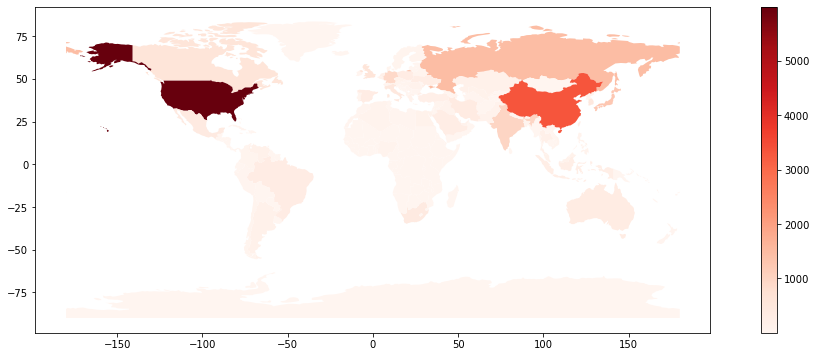

In [48]:
gdf_co2_emissions_2000.plot(figsize = (18, 6), column='co2', legend=True, cmap = 'Reds')

In [49]:
gdf_co2_emissions_2010 = pd.merge(world, df_co2_emissions_2010, on='iso_code')
gdf_co2_emissions_2010

,iso_code,geometry,country,year,co2,population
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2010,1.201,859816.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2010,6.925,44346532.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2010,555.550,34147566.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2010,5698.056,309011469.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2010,250.897,16252273.0
...,...,...,...,...,...,...
164,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,2010,8.500,2070737.0
165,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,2010,45.696,8991258.0
166,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2010,2.422,624279.0
167,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2010,46.959,1328144.0


<AxesSubplot:>

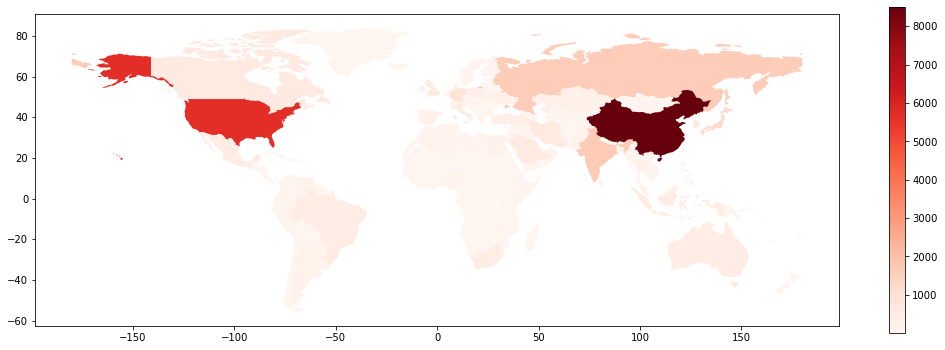

In [50]:
gdf_co2_emissions_2010.plot(figsize = (18, 6), column='co2', legend=True, cmap = 'Reds')

In [51]:
gdf_co2_emissions_2019 = pd.merge(world, df_co2_emissions_2019, on='iso_code')
gdf_co2_emissions_2019

,iso_code,geometry,country,year,co2,population
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2019,2.257,889955.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2019,11.626,58005461.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2019,576.651,37411038.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2019,5284.697,329064917.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2019,313.798,18551428.0
...,...,...,...,...,...,...
164,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,2019,8.041,2083458.0
165,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,2019,54.667,8772228.0
166,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2019,2.461,627988.0
167,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2019,37.864,1394969.0


<AxesSubplot:>

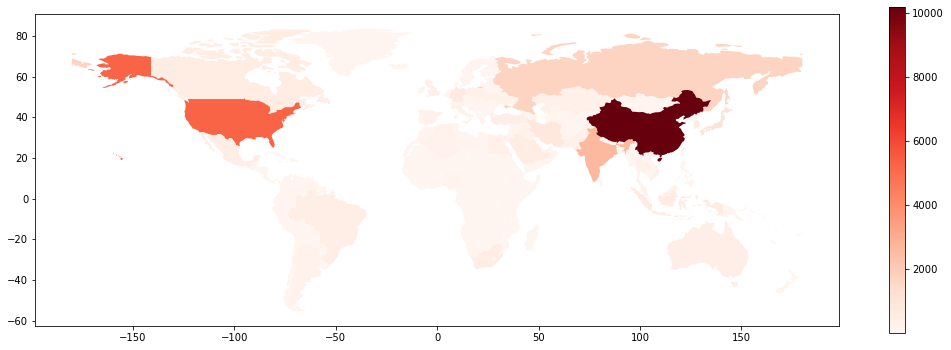

In [52]:
gdf_co2_emissions_2019.plot(figsize = (18, 6), column='co2', legend=True, cmap = 'Reds')

In [72]:
carbono_XX = df_co2_emissions.loc[df_co2_emissions["year"] >= 2000]
carbono_XX = pd.pivot_table(carbono_XX[["co2", "country"]], index = "country", aggfunc = "mean")
carbono_XX

,co2
country,
Afghanistan,5.522500
Africa,1176.779550
Albania,4.440850
Algeria,120.716600
Andorra,0.507850
...,...
Wallis and Futuna,0.025579
World,31890.977350
Yemen,17.708000


# Analisis exploratorio

In [53]:
df_co2_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24651 entries, 0 to 24650
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso_code    21489 non-null  object 
 1   country     24651 non-null  object 
 2   year        24651 non-null  int64  
 3   co2         23403 non-null  float64
 4   population  22327 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 963.1+ KB


In [54]:
df_co2_emissions.head()

,iso_code,country,year,co2,population
0,AFG,Afghanistan,1949,0.015,7624058.0
1,AFG,Afghanistan,1950,0.084,7752117.0
2,AFG,Afghanistan,1951,0.092,7840151.0
3,AFG,Afghanistan,1952,0.092,7935996.0
4,AFG,Afghanistan,1953,0.106,8039684.0


In [55]:
df_co2_emissions.tail()

,iso_code,country,year,co2,population
24646,ZWE,Zimbabwe,2015,12.170,13814642.0
24647,ZWE,Zimbabwe,2016,10.815,14030338.0
24648,ZWE,Zimbabwe,2017,10.247,14236599.0
24649,ZWE,Zimbabwe,2018,11.341,14438812.0
24650,ZWE,Zimbabwe,2019,10.374,14645473.0


In [56]:
df_co2_emissions.describe()

,year,co2,population
count,24651.000000,23403.000000,2.232700e+04
mean,1952.149933,267.675691,7.126411e+07
std,53.798458,1502.695270,3.788795e+08
min,1750.000000,0.000000,1.490000e+03
25%,1923.000000,0.539000,1.425638e+06
50%,1966.000000,5.089000,5.013167e+06
75%,1994.000000,43.946500,1.791284e+07
max,2019.000000,36441.388000,7.713468e+09


In [57]:
datos_analisis = df_co2_emissions.drop(["iso_code", "year"], axis = 1)

In [58]:
paises = datos_analisis.groupby("country")

In [59]:
datos_analizados = paises.describe().transpose()
# Analisis de datos cantidad de co2 producida por cada pais junto 
# al analisis de la poblacion a lo largo de todos los años
datos_analizados

country            Afghanistan        Africa       Albania       Algeria  \
co2        count  7.100000e+01  1.360000e+02  8.700000e+01  1.040000e+02   
           mean   2.554606e+00  3.400773e+02  3.247080e+00  4.274507e+01   
           std    2.905070e+00  4.265170e+02  2.425304e+00  4.988832e+01   
           min    1.500000e-02  2.200000e-02  7.000000e-03  4.000000e-03   
           25%    8.245000e-01  2.453625e+01  8.830000e-01  4.295000e-01   
           50%    1.530000e+00  1.043410e+02  3.004000e+00  8.741000e+00   
           75%    2.684000e+00  6.587763e+02  4.937000e+00  8.380675e+01   
           max    1.210600e+01  1.448793e+03  8.977000e+00  1.717070e+02   
population count  7.100000e+01  1.360000e+02  8.700000e+01  1.040000e+02   
           mean   1.678587e+07  3.940609e+08  2.262908e+06  1.778399e+07   
           std    8.813837e+06  3.220870e+08  8.045575e+05  1.144529e+07   
           min    7.624058e+06  1.308486e+08  1.032142e+06  5.615995e+06   
           25%    1.028739e+07  1.486998e+08  1.401444e+06  7.825128e+06   
           50%    1.288252e+07  2.347122e+08  2.464981e+06  1.346930e+07   
           75%    2.210388e+07  5.525514e+08  3.018338e+06  2.778008e+07   
           max    3.804176e+07  1.308064e+09  3.286070e+06  4.305305e+07   

country                Andorra        Angola      Anguilla  Antarctica  \
co2        count     30.000000  7.000000e+01     30.000000   21.000000   
           mean       0.484767  1.015674e+01      0.110200    0.007476   
           std        0.049566  1.203635e+01      0.037184    0.004320   
           min        0.407000  1.870000e-01      0.051000    0.004000   
           25%        0.462500  1.581500e+00      0.071750    0.004000   
           50%        0.481500  5.056000e+00      0.119000    0.007000   
           75%        0.524000  1.081725e+01      0.143000    0.011000   
           max        0.575000  4.424900e+01      0.154000    0.015000   
population count     30.000000  7.000000e+01     30.000000    0.000000   
           mean   72496.200000  1.255904e+07  12112.900000         NaN   
           std     9314.445172  7.868969e+06   1898.088773         NaN   
           min    54508.000000  4.548021e+06   8894.000000         NaN   
           25%    64329.250000  5.776156e+06  10462.000000         NaN   
           50%    76623.500000  9.788374e+06  12336.000000         NaN   
           75%    80380.750000  1.737600e+07  13748.500000         NaN   
           max    84461.000000  3.182530e+07  14872.000000         NaN   

country           Antigua and Barbuda     Argentina  ...       Uruguay  \
co2        count            63.000000  1.330000e+02  ...  8.800000e+01   
           mean              0.335111  6.232431e+01  ...  4.145227e+00   
           std               0.211362  6.287317e+01  ...  2.368496e+00   
           min               0.022000  8.900000e-01  ...  5.100000e-02   
           25%               0.216000  8.907000e+00  ...  3.254250e+00   
           50%               0.330000  3.609500e+01  ...  4.558500e+00   
           75%               0.448500  1.106170e+02  ...  5.744250e+00   
           max               1.257000  1.923660e+02  ...  8.593000e+00   
population count            63.000000  1.330000e+02  ...  8.800000e+01   
           mean          70042.714286  2.020530e+07  ...  2.776888e+06   
           std           12938.682443  1.263999e+07  ...  5.089005e+05   
           min           51360.000000  3.063095e+06  ...  1.792720e+06   
           25%           61782.000000  8.828805e+06  ...  2.334834e+06   
           50%           63649.000000  1.809429e+07  ...  2.835772e+06   
           75%           79829.000000  3.069896e+07  ...  3.275382e+06   
           max           97115.000000  4.478068e+07  ...  3.461731e+06   

country             Uzbekistan        Vanuatu     Venezuela       Vietnam  \
co2        count  1.680000e+02      58.000000  1.070000e+02  1.280000e+02   
           mean   3.933974e+01     

In [60]:
datos_analizados = datos_analizados.fillna(0)

In [61]:
mean_population = []
mean_co2 = []

for i in df_co2_emissions["country"].unique():
    
    media_co2 = datos_analizados[i]["co2"]["mean"]
    media_poblacion = datos_analizados[i]["population"]["mean"]
    
    mean_co2.append(media_co2)
    mean_population.append(media_poblacion)

In [62]:
df = pd.DataFrame(columns = ["mean_co2", "mean_population"])
df["mean_population"] = mean_population
df["mean_co2"] = mean_co2
df["country"] = df_co2_emissions["country"].unique()

# En este DataFrame se puede ver la media de co2 y la media de la poblacion por
# cada pais.

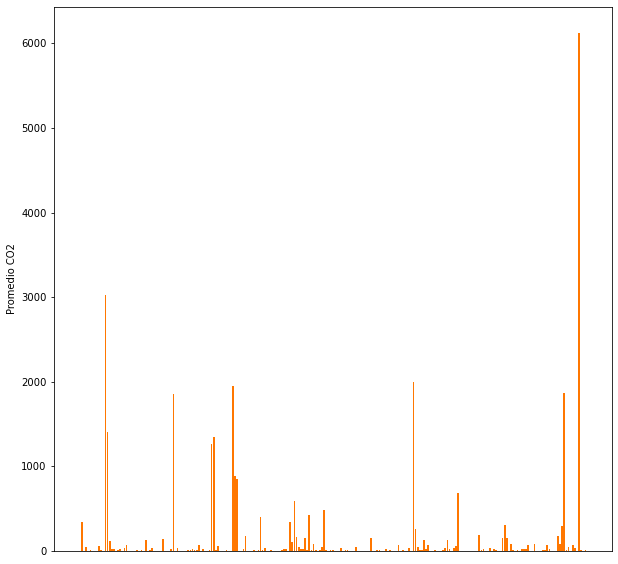

In [63]:
fig, ax = plt.subplots(figsize = (10, 10))

ax.set_ylabel('Promedio CO2')

# Creamos x e y
x = df["country"]
y = df["mean_co2"]

plt.bar(x,y, color = "#ff7700")
plt.xticks([])

plt.show()

In [64]:
df_co2_emissions["co2"].sum()
# La cantidad de co2 total emitida por todos los paises del mundo.

6264414.203

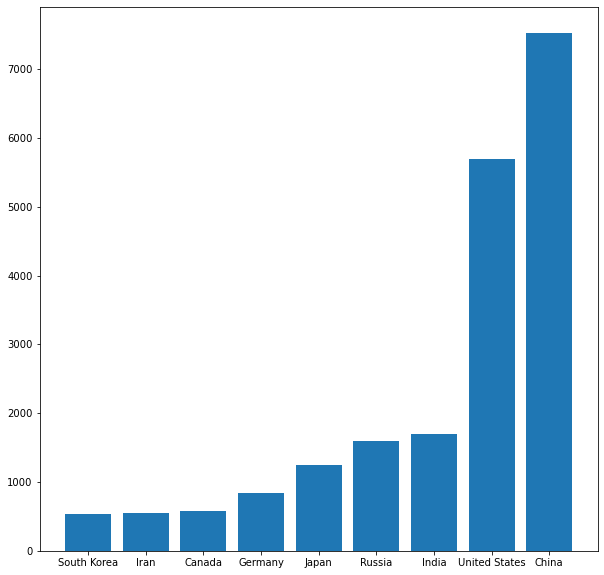

In [91]:
carbono_XX.sort_values(by = "co2", inplace = True)
carbono_paises = carbono_XX.copy()
carbono_paises.drop(["World", "Asia", "North America", "Europe", "Asia (excl. China & India)", "EU-28", "EU-27","Europe (excl. EU-27)", "Europe (excl. EU-28)", "South America", "International transport", "Africa", "North America (excl. USA)"], inplace = True)
carbono_paises = carbono_paises.tail(9)

fig, ax = plt.subplots(figsize = (10, 10))
plt.bar(carbono_paises.index, carbono_paises["co2"])
plt.title("Países con mayor emisión de CO2 en promedio por año")
plt.xticks(carbono_paises.index)
plt.show()

In [65]:
metano = pd.read_csv("methane-emissions per country.csv")
metano.info()
metano.rename(columns = {"Total including LUCF (CH4 emissions, CAIT)" : "Emisión de metano"}, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      5211 non-null   object 
 1   Code                                        5157 non-null   object 
 2   Year                                        5211 non-null   int64  
 3   Total including LUCF (CH4 emissions, CAIT)  5211 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 163.0+ KB


In [92]:
metano = metano.loc[metano["Year"] >= 2000]
metano_promedio_pais = pd.pivot_table(metano[["Entity", "Emisión de metano"]], index = "Entity", aggfunc = "mean")
metano_promedio_pais.sort_values(by = "Emisión de metano", inplace = True)
metano_promedio_pais = metano_promedio_pais.drop("European Union (27)")
metano_paises = metano_promedio_pais.iloc[-10: -1]
metano_paises

,Emisión de metano
Entity,
Mexico,1.236553e+08
Iran,1.286365e+08
Australia,1.493359e+08
Indonesia,3.472800e+08
Brazil,4.095288e+08
India,6.371382e+08
United States,6.749612e+08
Russia,8.133841e+08
China,1.005464e+09


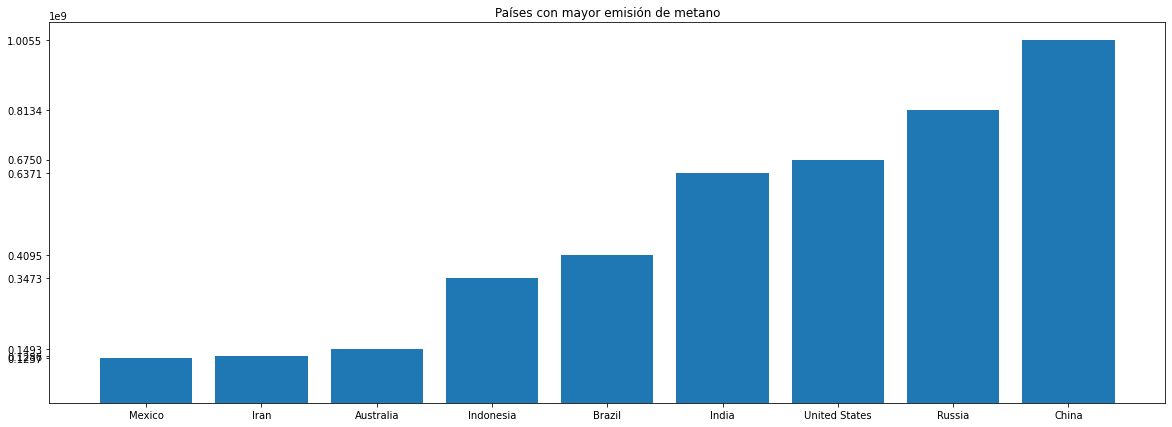

In [93]:
fig = plt.subplots(figsize = (20, 7))
plt.bar(metano_paises.index, metano_paises["Emisión de metano"])
plt.yticks(metano_paises["Emisión de metano"])
plt.title("Países con mayor emisión de metano en promedio por año")
plt.show()

In [142]:
cattle_country = pd.read_csv("cattle-livestock-count-heads.csv")
cattle_country.rename(columns = {'Live Animals - Cattle - 866 - Stocks - 5111 - Head':'Count', 'Entity':'country'}, inplace = True)
cattle_country = cattle_country.loc[(cattle_country['Year'] >= 2000) & (cattle_country['Year'] <= 2020)]
words = ['Asia', 'Central America', 'Northern Africa', 'Oceania', 'Middle Africa', 'Australia & New Zealand', 'Europe, Western', 'South Eastern Asia', 'Western Africa', 'Europe', 'Eastern Europe', 'Eastern Africa', 'Eastern Asia', 'Africa', 'Americas', 'Northern America', 'Low Income Food Deficit Countries', 'Net Food Importing Developing Countries', 'World', 'European Union', 'South America', 'Southern Asia', 'Least Developed Countries', 'Land Locked Developing Countries']
for word in words:
    row = cattle_country.index[cattle_country['country'] == word]
    cattle_country.drop(row, inplace= True)

cattle_country = pd.pivot_table(cattle_country[["country", "Count"]], index = "country", aggfunc = "mean")
cattle_country.sort_values(by = "Count", inplace = True)
index_ = list(cattle_country.index)
index_[-7] = 'Sudan'
cattle_country.index = index_
cattle_country_top = cattle_country.tail(9)

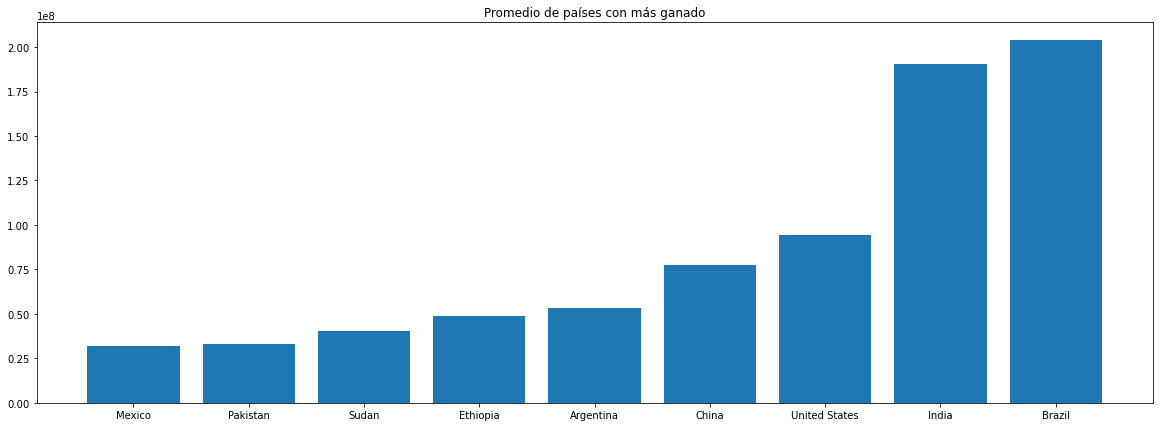

In [137]:
fig = plt.subplots(figsize = (20, 7))
plt.bar(cattle_country_top.index, cattle_country_top["Count"])
#plt.yticks(cattle_country["Emisión de metano"])
plt.title("Promedio de países con más ganado")
plt.show()


In [143]:
cattle_country = cattle_country.merge(df_co2_emissions[["iso_code", "country"]], left_index = True, right_on = "country")
cattle_country.drop_duplicates(inplace = True)

<AxesSubplot:>

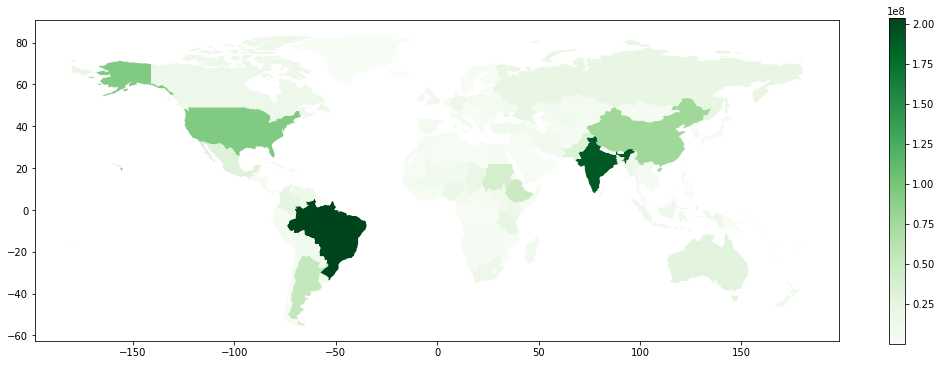

In [147]:
gdf_cattle_country = pd.merge(world[["iso_code", "geometry"]], cattle_country, on='iso_code')
gdf_cattle_country.plot(figsize = (18, 6), column = 'Count', legend=True, cmap = 'Greens')

In [181]:
import datetime as dt
temp = pd.read_csv("GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv")
temp = temp.loc[temp["Country"] != "Ã…land"]

In [184]:
temp_dt =temp.copy()
temp_dt["dt"] = pd.to_datetime(temp_dt["dt"])

In [185]:
temp_dt["dt"] = temp_dt["dt"].apply(lambda row: row.strftime("%Y"))

In [218]:
fecha = dt.datetime(2000, 1, 1)
fecha = fecha.strftime("%Y")
temp_dt = temp_dt.loc[temp_dt["dt"] >= fecha]
rows = temp_dt.index[temp_dt["Country"] == "Åland"]
temp_dt.drop(rows, inplace = True)

In [219]:
temp_dt2 = pd.pivot_table(temp_dt[["AverageTemperature", "dt", "Country"]], index = "Country", columns = "dt", aggfunc = "mean", fill_value = 0)
temp_dt2

AverageTemperature                                              \
dt                           2000       2001       2002       2003       2004   
Country                                                                         
Afghanistan             15.497833  15.778083  15.537667  14.916000  15.770917   
Africa                  24.588083  24.841167  24.961333  25.025583  24.895917   
Albania                 13.746583  13.690417  13.559917  13.626583  13.258167   
Algeria                 24.032250  24.724417  24.263000  24.393667  23.916000   
American Samoa          27.219833  27.227583  27.537917  27.264833  27.281167   
...                           ...        ...        ...        ...        ...   
Virgin Islands          26.730583  27.133167  27.297833  27.376583  27.029250   
Western Sahara          23.020083  23.704917  23.457833  23.408917  23.420667   
Yemen                   27.436167  27.068917  27.125167  27.357750  27.334083   
Zambia                  21.558750  21.802417  22.292417  22.156750  21.768083   
Zimbabwe                21.149000  21.693667  22.081083  21.891250  21.330917   

                                                                       \
dt                   2005       2006       2007       2008       2009   
Country                                                                 
Afghanistan     14.980000  15.595583  15.106167  15.216500  15.257750   
Africa          25.156167  24.818917  24.851500  24.754667  25.026500   
Albania         12.747083  12.976917  13.890500  13.955167  13.844250   
Algeria         24.222583  24.200833  24.065333  23.950250  24.154333   
American Samoa  27.373500  27.081250  27.452417  26.995083  27.034250   
...                   ...        ...        ...        ...        ...   
Virgin Islands  27.424667  27.374833  27.470000  26.924000  27.238500   
Western Sahara  23.507667  23.441833  23.145417  23.323083  23.381083   
Yemen           27.294667  27.175000  27.310750  26.807500  27.342417   
Zambia          22.813500  21.784250  21.838500  21.535833  21.670250   
Zimbabwe        22.509917  21.618750  21.604250  21.545583  21.377250   

                                                            
dt                   2010       2011       2012       2013  
Country                                                     
Afghanistan     15.828667  15.518000  14.481583  16.533625  
Africa          25.472500  24.786500  24.725917  25.208750  
Albania         13.775417  13.443250  13.768250  14.993875  
Algeria         25.215667  24.144167  23.954833  25.121500  
American Samoa  27.453417  27.009500  27.201417  27.517250  
...                   ...        ...        ...        ...  
Virgin Islands  27.593667  27.159250  27.360167  27.312333  
Western Sahara  24.114250  23.401250  23.303417  23.744250  
Yemen           27.302750  27.288250  27.445000  28.129750  
Zambia          22.267500  21.771583  21.697750  21.196000  
Zimbabwe        21.986250  21.602417  21.521333  20.710750  

[241 rows x 14 columns]

In [220]:
temp_dt2= temp_dt2.merge(df_co2_emissions[["iso_code", "country"]], left_on = "Country",right_on = "country")  
gdf_temp = temp_dt2.merge(world[["iso_code", "geometry"]], on='iso_code')
gdf_temp

D:\Anaconda\envs\ICD venv\lib\site-packages\pandas\core\frame.py:9186: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,"(AverageTemperature, 2000)","(AverageTemperature, 2001)","(AverageTemperature, 2002)","(AverageTemperature, 2003)","(AverageTemperature, 2004)","(AverageTemperature, 2005)","(AverageTemperature, 2006)","(AverageTemperature, 2007)","(AverageTemperature, 2008)","(AverageTemperature, 2009)","(AverageTemperature, 2010)","(AverageTemperature, 2011)","(AverageTemperature, 2012)","(AverageTemperature, 2013)",iso_code,country,geometry
0,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16934,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
16935,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
16936,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
16937,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [221]:
gdf_temp = gpd.GeoDataFrame(gdf_temp)

<AxesSubplot:>

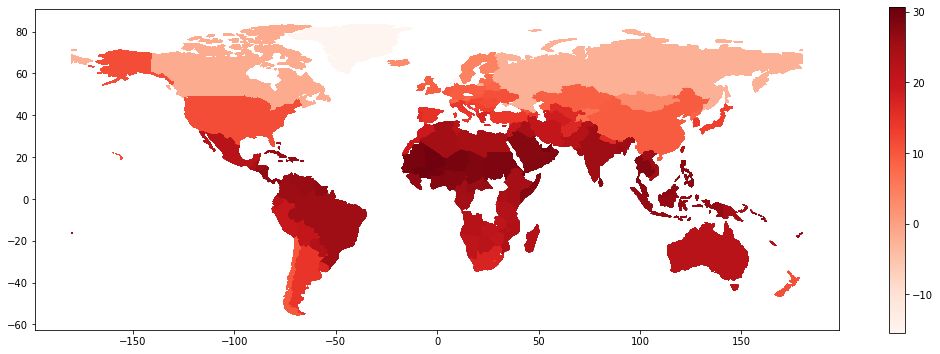

In [226]:
gdf_temp.plot(figsize = (18, 6), column = ('AverageTemperature', '2013'), legend=True, cmap = 'Reds')

# Regresion lineal

In [49]:
!pip install seaborn

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [51]:
data = df_co2_emissions.drop(["iso_code", "country"], axis = 1)
data = data.fillna(0)

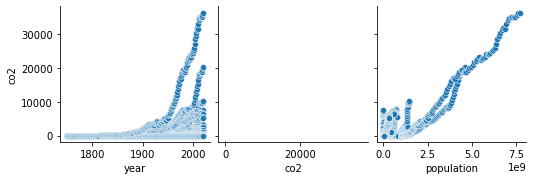

In [60]:
sns.pairplot(data, y_vars="co2")

In [61]:
y = data['co2']
X = data.drop('co2',axis = 1)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

y_predict_train=lin_reg.predict(X_train)
mse_train=mean_squared_error(y_train, y_predict_train)
r2_train=lin_reg.score(X_train, y_train)

y_predict_test=lin_reg.predict(X_test)
mse_test=mean_squared_error(y_test, y_predict_test)
r2_test=lin_reg.score(X_test, y_test)

In [ ]:
print(f"R2 train:{r2_train}")
print(f"R2 test: {r2_test}")

mse=cross_val_score(lin_reg, X_test, y_test, cv=5)
mean_mse=np.mean(mse)

print(f"Error cuadratico medio: {mean_mse}")

R2 train:0.7343561227743076
R2 test: 0.5575340416843593
Error cuadratico medio: 0.5543519825280375


Coeficientes: [ 120.42715078 1306.61082063]


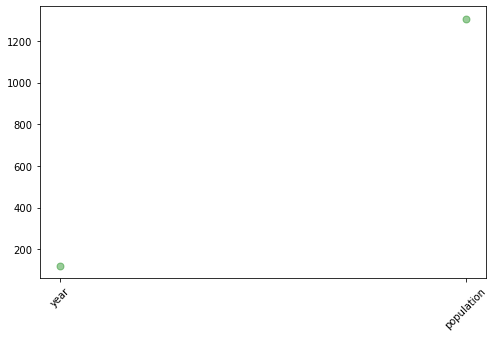

In [ ]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 45);


print('Coeficientes:',lin_reg.coef_)

In [ ]:
# Se produce overfitting debido a que la cantidad de datos es muy baja, es decir, si quisieramos
# predecir de una mejor manera, deberiamos tener mas datos relacionados al co2

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print(f"R2 train: {Ridge_train_score}")
print(f"R2 test: {Ridge_test_score}")

R2 train: 0.7343561227740942
R2 test: 0.5575343489917246


Alpha: 0.01
R2 train: 0.7343561227740942
R2 test: 0.5575343489917246
Error cuadratico medio: 0.5543522497805629
Alpha: 0.1
R2 train: 0.7343561227529696
R2 test: 0.5575371147135815
Error cuadratico medio: 0.5543546547552874
Alpha: 1
R2 train: 0.7343561206407121
R2 test: 0.5575647675339606
Error cuadratico medio: 0.5543786750112868
Alpha: 10
R2 train: 0.7343559096217387
R2 test: 0.5578408563130077
Error cuadratico medio: 0.5546159393416923
Alpha: 100
R2 train: 0.7343350128458326
R2 test: 0.5605581928920804
Error cuadratico medio: 0.5567053416993365


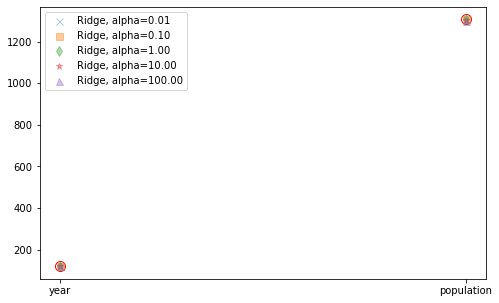

In [ ]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='none',marker='o',markersize=10,color='r',lw=4,mfc='None')

mk=['x','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    rr = Ridge(alpha=al) 
    rr.fit(X_train, y_train)
    
    Ridge_train_score = rr.score(X_train,y_train)
    Ridge_test_score = rr.score(X_test, y_test)
    mse=cross_val_score(rr, X_test, y_test, cv=5)
    mean_mse=np.mean(mse)

    print(f"R2 train: {Ridge_train_score}")
    print(f"R2 test: {Ridge_test_score}")
    print(f"Error cuadratico medio: {mean_mse}")

    ax.plot(rr.coef_,alpha=0.4,linestyle='none',marker=mk[na],markersize=7,label='Ridge, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns);
ax.legend();

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

ll = Lasso(alpha=0.01) 
ll.fit(X_train, y_train)

Lasso_train_score = ll.score(X_train,y_train)
Lasso_test_score = ll.score(X_test, y_test)

print(f"R2 train (Lasso): {Lasso_train_score}")
print(f"R2 test (Lasso): {Lasso_test_score}")

R2 train (Lasso): 0.7343561226909904
R2 test (Lasso): 0.5575384500183216


Alpha: 0.01
R2 train (Lasso): 0.7343561226909904
R2 test (Lasso): 0.5575384500183216
Error cuadratico medio: 0.5543532613009542
Alpha: 0.1
R2 train (Lasso): 0.7343561144396384
R2 test (Lasso): 0.5575781138691205
Error cuadratico medio: 0.5543647568963599
Alpha: 1
R2 train (Lasso): 0.7343552892778515
R2 test (Lasso): 0.5579736247794387
Error cuadratico medio: 0.5544783899749747
Alpha: 10
R2 train (Lasso): 0.7342727728333396
R2 test (Lasso): 0.5618159741153734
Error cuadratico medio: 0.5554824332168221
Alpha: 100
R2 train (Lasso): 0.7260211257239175
R2 test (Lasso): 0.5889634907500287
Error cuadratico medio: 0.5522941112053108


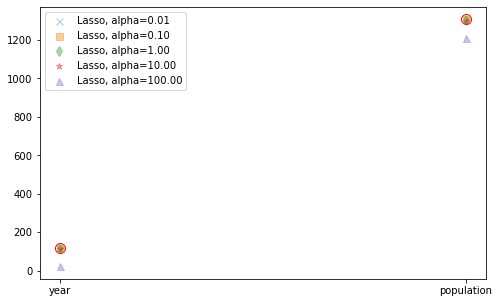

In [ ]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='none',marker='o',markersize=10,color='r',lw=4,mfc='None')

mk=['x','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    ll = Lasso(alpha=al) 
    ll.fit(X_train, y_train)

    Lasso_train_score = ll.score(X_train,y_train)
    Lasso_test_score = ll.score(X_test, y_test)
    mse=cross_val_score(ll, X_test, y_test, cv=5)
    mean_mse=np.mean(mse)


    print(f"R2 train (Lasso): {Lasso_train_score}")
    print(f"R2 test (Lasso): {Lasso_test_score}")
    print(f"Error cuadratico medio: {mean_mse}")
    ax.plot(ll.coef_,alpha=0.4,linestyle='none',marker=mk[na],markersize=7,label='Lasso, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns);
ax.legend();

# Metano

In [ ]:
df_metano = pd.read_csv('Data_limpio_emisiones_de_metano.csv')
df_metano = df_metano.drop("Unnamed: 0", axis = 1)

# Regresion (Metano)

In [ ]:
data = df_metano.drop(["Country Code" , "Country Name"], axis = 1)

In [ ]:
data

,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,10.2469,10.4531,10.6570,10.8551,11.0415,11.2194,11.5069,11.6718,12.2338,12.4857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,384746.7182,265076.7091,278192.0872,296153.8053,269903.4576,303388.4675,286699.8136,319345.1963,327883.6744,396278.3059,...,496350.0,515480.0,523850.0,534240.0,538060.0,543720.0,554570.0,563050.0,564380.0,570040.0
2,10202.0000,10201.5000,9170.5900,9403.5400,9987.9300,10476.6000,10535.6000,10455.9000,10380.1000,10176.2000,...,25430.0,30010.0,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0
3,143714.5355,145309.3393,149181.1477,161770.8276,146860.2617,145799.6598,154139.5180,166472.3378,152491.7936,176884.3183,...,305760.0,315610.0,327790.0,336470.0,348150.0,356630.0,368640.0,383250.0,386400.0,392130.0
4,23376.6000,14500.0000,15590.0000,16651.7000,15008.3000,17061.4000,15036.7000,17437.0000,18279.2000,22903.7000,...,35590.0,37730.0,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,2204.6700,2350.9700,2338.2200,2275.6300,2397.2700,2456.2800,2353.0100,2379.9500,2404.6000,2427.4400,...,7870.0,8020.0,8120.0,8150.0,8210.0,8270.0,8200.0,8150.0,8210.0,8590.0
263,32269.9000,31853.4000,32150.2000,33393.0000,34374.5000,35700.4000,36502.3000,37856.4000,38728.0000,41239.3000,...,42490.0,43360.0,43580.0,44220.0,44260.0,44600.0,44560.0,44460.0,44990.0,45140.0
264,33880.5000,14742.8000,16642.0000,18544.1000,14937.9000,19599.6000,16628.4000,20391.4000,21838.0000,31530.3000,...,14290.0,15340.0,15050.0,16900.0,17420.0,17530.0,18010.0,17850.0,17450.0,17870.0


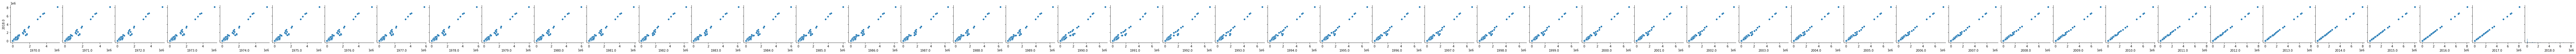

In [ ]:
sns.pairplot(data, y_vars="2018.0")

In [ ]:
y = data['2018.0']
X = data.drop('2018.0',axis = 1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

y_predict_train=lin_reg.predict(X_train)
mse_train=mean_squared_error(y_train, y_predict_train)
r2_train=lin_reg.score(X_train, y_train)

y_predict_test=lin_reg.predict(X_test)
mse_test=mean_squared_error(y_test, y_predict_test)
r2_test=lin_reg.score(X_test, y_test)

In [ ]:
print(f"R2 train:{r2_train}")
print(f"R2 test: {r2_test}")

mse=cross_val_score(lin_reg, X_test, y_test, cv=5)
mean_mse=np.mean(mse)

print(f"Error cuadratico medio: {mean_mse}")

R2 train:0.9999998149284561
R2 test: 0.950587914663102
Error cuadratico medio: 0.9991765863050455


Coeficientes: [ 9.35271732e+04 -1.22103960e+05 -3.67979701e+04  9.17815156e+04
 -5.79900464e+02 -1.31832329e+04  1.18638806e+05 -1.42774576e+05
  3.06731662e+03  1.35623790e+04  1.57254821e+04 -1.05052181e+05
  9.12044524e+04 -4.72812916e+04  9.30141431e+04 -2.09230586e+04
  2.36347032e+04 -1.58195758e+05  1.42439326e+05 -6.16785241e+04
  2.72802884e+05 -5.35039377e+05  2.90901961e+05  5.68785599e+04
 -2.10449325e+05  2.88427328e+04  2.06500201e+05 -6.08955663e+04
  4.68696662e+04 -1.53677168e+05  1.69383647e+05 -9.59608972e+03
 -7.84619934e+04  9.51840002e+04 -1.30797930e+05  7.77391648e+04
 -1.12121591e+05  1.66004266e+05 -1.81152512e+05  7.14784560e+04
 -5.60862210e+04  1.36259346e+05 -2.33825273e+05 -1.28968516e+05
  6.24138283e+05 -7.96396448e+05  1.18234437e+05  1.29032034e+06]


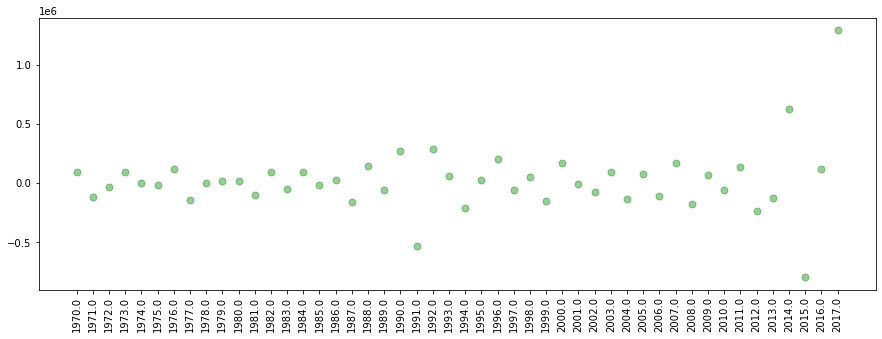

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 90);


print('Coeficientes:',lin_reg.coef_)

In [ ]:
# Se produce overfitting por la cantidad de datos, hay que eliminar algunos, es decir
# hacer un dataframe mas basico

# Ridge (Metano)

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print(f"R2 train: {Ridge_train_score}")
print(f"R2 test: {Ridge_test_score}")

R2 train: 0.9999948157499248
R2 test: 0.9505196615230013


Alpha: 0.01
R2 train: 0.9999948157499248
R2 test: 0.9505196615230013
Error cuadratico medio: 0.9993186016632499
Alpha: 0.1
R2 train: 0.9999823289658452
R2 test: 0.9504751115890009
Error cuadratico medio: 0.9984378434516152
Alpha: 1
R2 train: 0.9999047992709325
R2 test: 0.950269157391069
Error cuadratico medio: 0.9958178627520777
Alpha: 10
R2 train: 0.9988793464123579
R2 test: 0.9487853461700038
Error cuadratico medio: 0.9912894136537524
Alpha: 100
R2 train: 0.9932488937990342
R2 test: 0.941850336197281
Error cuadratico medio: 0.9845970502477182


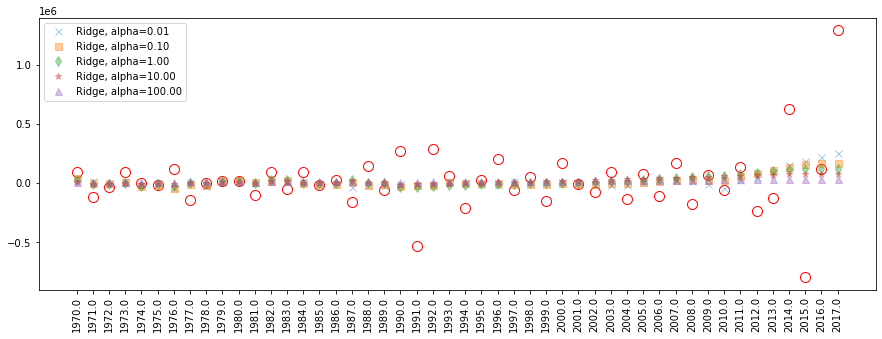

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='none',marker='o',markersize=10,color='r',lw=4,mfc='None')

mk=['x','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    rr = Ridge(alpha=al) 
    rr.fit(X_train, y_train)
    
    Ridge_train_score = rr.score(X_train,y_train)
    Ridge_test_score = rr.score(X_test, y_test)
    mse=cross_val_score(rr, X_test, y_test, cv=5)
    mean_mse=np.mean(mse)

    print(f"R2 train: {Ridge_train_score}")
    print(f"R2 test: {Ridge_test_score}")
    print(f"Error cuadratico medio: {mean_mse}")

    ax.plot(rr.coef_,alpha=0.4,linestyle='none',marker=mk[na],markersize=7,label='Ridge, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 90);
ax.legend();

In [ ]:
# De los mejores alpha es el 100

In [ ]:
rr = Ridge(alpha=100) 
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

mse=cross_val_score(rr, X_test, y_test, cv=5)
mean_mse=np.mean(mse)

print(f"R2 train: {Ridge_train_score}")
print(f"R2 test: {Ridge_test_score}")
print(f"Error cuadratico medio: {mean_mse}")

R2 train: 0.9932488937990342
R2 test: 0.941850336197281
Error cuadratico medio: 0.9845970502477182


Coeficientes: [12765.64404943  9542.77729443 11026.38510338 11430.71927192
  9389.90807818 10798.56123142 10837.30942774 13016.23503662
 13154.82523134 14212.92911728 13806.96334313 12650.19098818
 16520.71914184 16046.63341935 13515.19762748 13109.54388238
 14444.00546868 17570.00717304 14766.46777471 15632.20458841
 11987.09909122 12661.4000312  13382.52240545 14404.82832993
 15144.13858116 15960.10278388 16646.82727431 17031.05202681
 18402.78694621 19261.32051562 19845.41569621 20411.28600501
 21832.00030328 23483.31721787 24216.82163189 25612.41592756
 26180.61728549 27440.77064715 28435.77958631 29377.90569515
 30452.26949804 30944.77832238 31842.15830883 33008.5354009
 33375.00322789 34045.06111738 34907.14732455 34729.82275872]


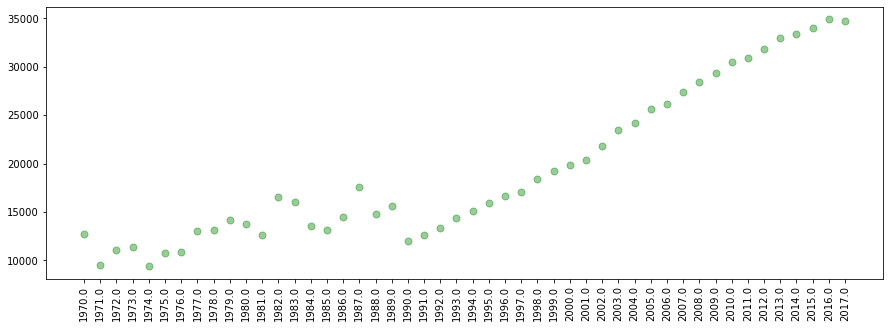

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(rr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green')
ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 90);


print('Coeficientes:',rr.coef_)

In [ ]:
# Hay overfitting por la complejidad de los datos

# Lasso (Metano)

In [ ]:
from sklearn.linear_model import Lasso

ll = Lasso(alpha=0.01) 
ll.fit(X_train, y_train)

Lasso_train_score = ll.score(X_train,y_train)
Lasso_test_score = ll.score(X_test, y_test)

print(f"R2 train (Lasso): {Lasso_train_score}")
print(f"R2 test (Lasso): {Lasso_test_score}")

R2 train (Lasso): 0.9996737204667451
R2 test (Lasso): 0.9501704140504877


Alpha: 0.01
R2 train (Lasso): 0.9996737204667451
R2 test (Lasso): 0.9501704140504877
Error cuadratico medio: 0.9851296460579633
Alpha: 0.1
R2 train (Lasso): 0.9996738542376258
R2 test (Lasso): 0.9501706730123622
Error cuadratico medio: 0.9851340658713899
Alpha: 1
R2 train (Lasso): 0.9996751948103852
R2 test (Lasso): 0.9501732649972816
Error cuadratico medio: 0.9851780748885492
Alpha: 10
R2 train (Lasso): 0.9996887523396979
R2 test (Lasso): 0.9501995437560397
Error cuadratico medio: 0.9856122422492206
Alpha: 100
R2 train (Lasso): 0.9997613584108522
R2 test (Lasso): 0.9503099129508834
Error cuadratico medio: 0.9889411082941821


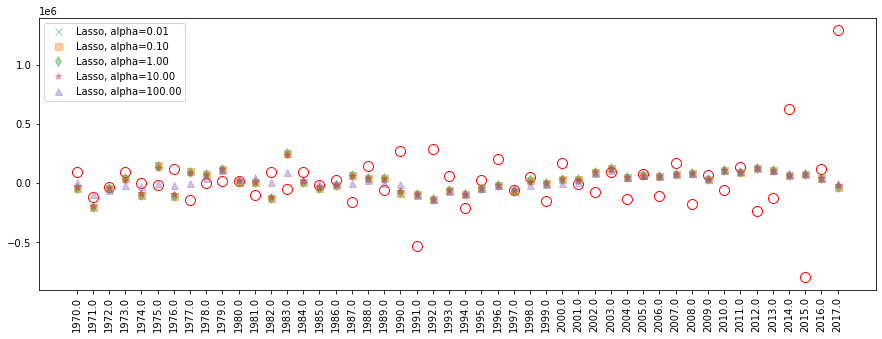

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='none',marker='o',markersize=10,color='r',lw=4,mfc='None')

mk=['x','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    ll = Lasso(alpha=al) 
    ll.fit(X_train, y_train)

    Lasso_train_score = ll.score(X_train,y_train)
    Lasso_test_score = ll.score(X_test, y_test)
    mse=cross_val_score(ll, X_test, y_test, cv=5)
    mean_mse=np.mean(mse)


    print(f"R2 train (Lasso): {Lasso_train_score}")
    print(f"R2 test (Lasso): {Lasso_test_score}")
    print(f"Error cuadratico medio: {mean_mse}")
    ax.plot(ll.coef_,alpha=0.4,linestyle='none',marker=mk[na],markersize=7,label='Lasso, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(X.columns)))
ax.set_xticklabels(X.columns, rotation = 90);
ax.legend();

In [ ]:
# Uno de los mejores alpha es el 100

In [ ]:
ll = Lasso(alpha=0.1) 
ll.fit(X_train, y_train)

Lasso_train_score = ll.score(X_train,y_train)
Lasso_test_score = ll.score(X_test, y_test)

mse=cross_val_score(ll, X_test, y_test, cv=5)
mean_mse=np.mean(mse)

print(f"R2 train (Lasso): {Lasso_train_score}")
print(f"R2 test (Lasso): {Lasso_test_score}")
print(f"Error cuadratico medio: {mean_mse}")

R2 train (Lasso): 0.9996738542376258
R2 test (Lasso): 0.9501706730123622
Error cuadratico medio: 0.9851340658713899


Coeficientes: [ -44136.21574901 -200748.58540405  -38308.36841082   46247.0267111
 -100120.53861747  148918.77253283 -111714.16499282   97419.69776034
   73974.72729046  120307.31588233   11996.75014484    4506.60832844
 -129726.43378664  257369.90521472    5737.25172299  -38682.91746594
  -15922.85051014   68118.45622227   43329.09601128   44487.86625278
  -80599.24678541  -89783.6613851  -137882.81934202  -60639.89636602
  -91835.15423015  -37873.26425233  -15290.60947773  -67554.07514544
   23934.9844245     1988.68408215   34096.70175616   30281.96848805
   93349.46658923  124756.71145176   50452.24777061   64000.31854237
   61250.40667424   77168.27346298   82871.70747092   31362.56872744
  112041.88482679   95323.7123824   130314.40214763  106343.99489325
   71487.78396597   78830.53568898   41693.94979506  -34605.55254072]


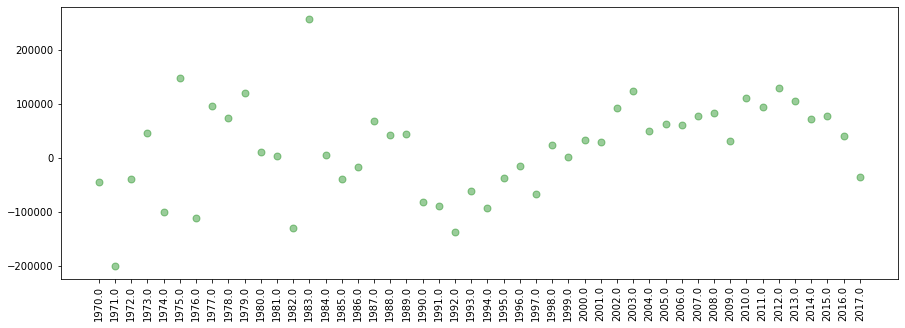

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(ll.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green')
ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 90);


print('Coeficientes:',ll.coef_)

In [ ]:
# Lo mismo de antes, se produce overfitting por la complejidad de los datos

In [229]:
col_temp = list(gdf_temp.columns)

X = gdf_temp[col_temp[0:-3]]
X

,"(AverageTemperature, 2000)","(AverageTemperature, 2001)","(AverageTemperature, 2002)","(AverageTemperature, 2003)","(AverageTemperature, 2004)","(AverageTemperature, 2005)","(AverageTemperature, 2006)","(AverageTemperature, 2007)","(AverageTemperature, 2008)","(AverageTemperature, 2009)","(AverageTemperature, 2010)","(AverageTemperature, 2011)","(AverageTemperature, 2012)","(AverageTemperature, 2013)"
0,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625
1,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625
2,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625
3,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625
4,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16934,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750
16935,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750
16936,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750
16937,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750
